# SAHI and YOLOv5


SAHI is a lightweight vision library for object detection and instance segmentation. It addresses challenges like small object detection and large image inference. It offers utilities for sliced/standard predictions using various models (yolov5/mmdet/detectron2/huggingface), COCO dataset operations, and evaluation.

| Code Credits | Link |
| ----------- | ---- |
| 🎉 Repository | [![GitHub Repository](https://img.shields.io/github/stars/obss/sahi?style=social)](https://github.com/obss/sahi) |
|Official tutorial notebooks|[SAHI Tutorials](https://github.com/obss/sahi#tutorials)|
| Original Colab | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb) |
| 🔥 Discover More Colab Notebooks | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/R3gm/InsightSolver-Colab/) |

## 0. Preperation

- Install latest version of SAHI and YOLOv5:

In [1]:
%pip install -U torch sahi yolov5

  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/953.5 kB ? eta -:--:--
   --------------------------------------- 953.5/953.5 kB 43.2 MB/s eta 0:00:00
Using cached idna-3.7-py3-none-any.whl (66 kB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
Using cached thop-0.1.1.post2209072238-py3-none-any.w

In [2]:
import os
os.getcwd()

'c:\\Users\\USER\\Desktop\\sahi'

- Import required modules:

In [3]:
# arrange an instance segmentation model for test
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a yolov5 model and two test images:

In [20]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov5_model_path = "C:\\Users\\USER\\Desktop\\yoloprogram\\fixed_best.pt"
download_yolov5s6_model(destination_path=yolov5_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv5 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [28]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov5',
    model_path=yolov5_model_path,
    confidence_threshold=0.3,
    device='cuda:0'
)

YOLOv5  2024-11-20 Python-3.12.7 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 214 layers, 7025023 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 


- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [101]:
result = get_prediction("demo_data/frame_750.jpg", detection_model)

c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [102]:
result = get_prediction(read_image("demo_data/frame_750.jpg"), detection_model)

c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


- Visualize predicted bounding boxes and masks over the original image:

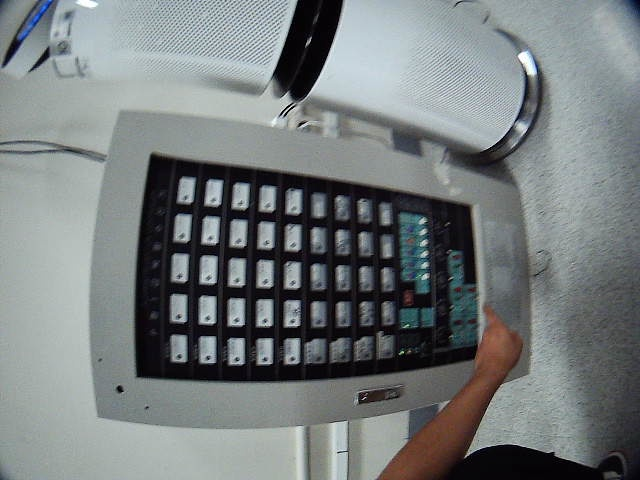

In [103]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/frame_750.jpg")

## 2. Sliced Inference with a YOLOv5 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [ ]:
result = get_sliced_prediction(
    "demo_data/frame_750.jpg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 64 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

- Visualize predicted bounding boxes and masks over the original image:

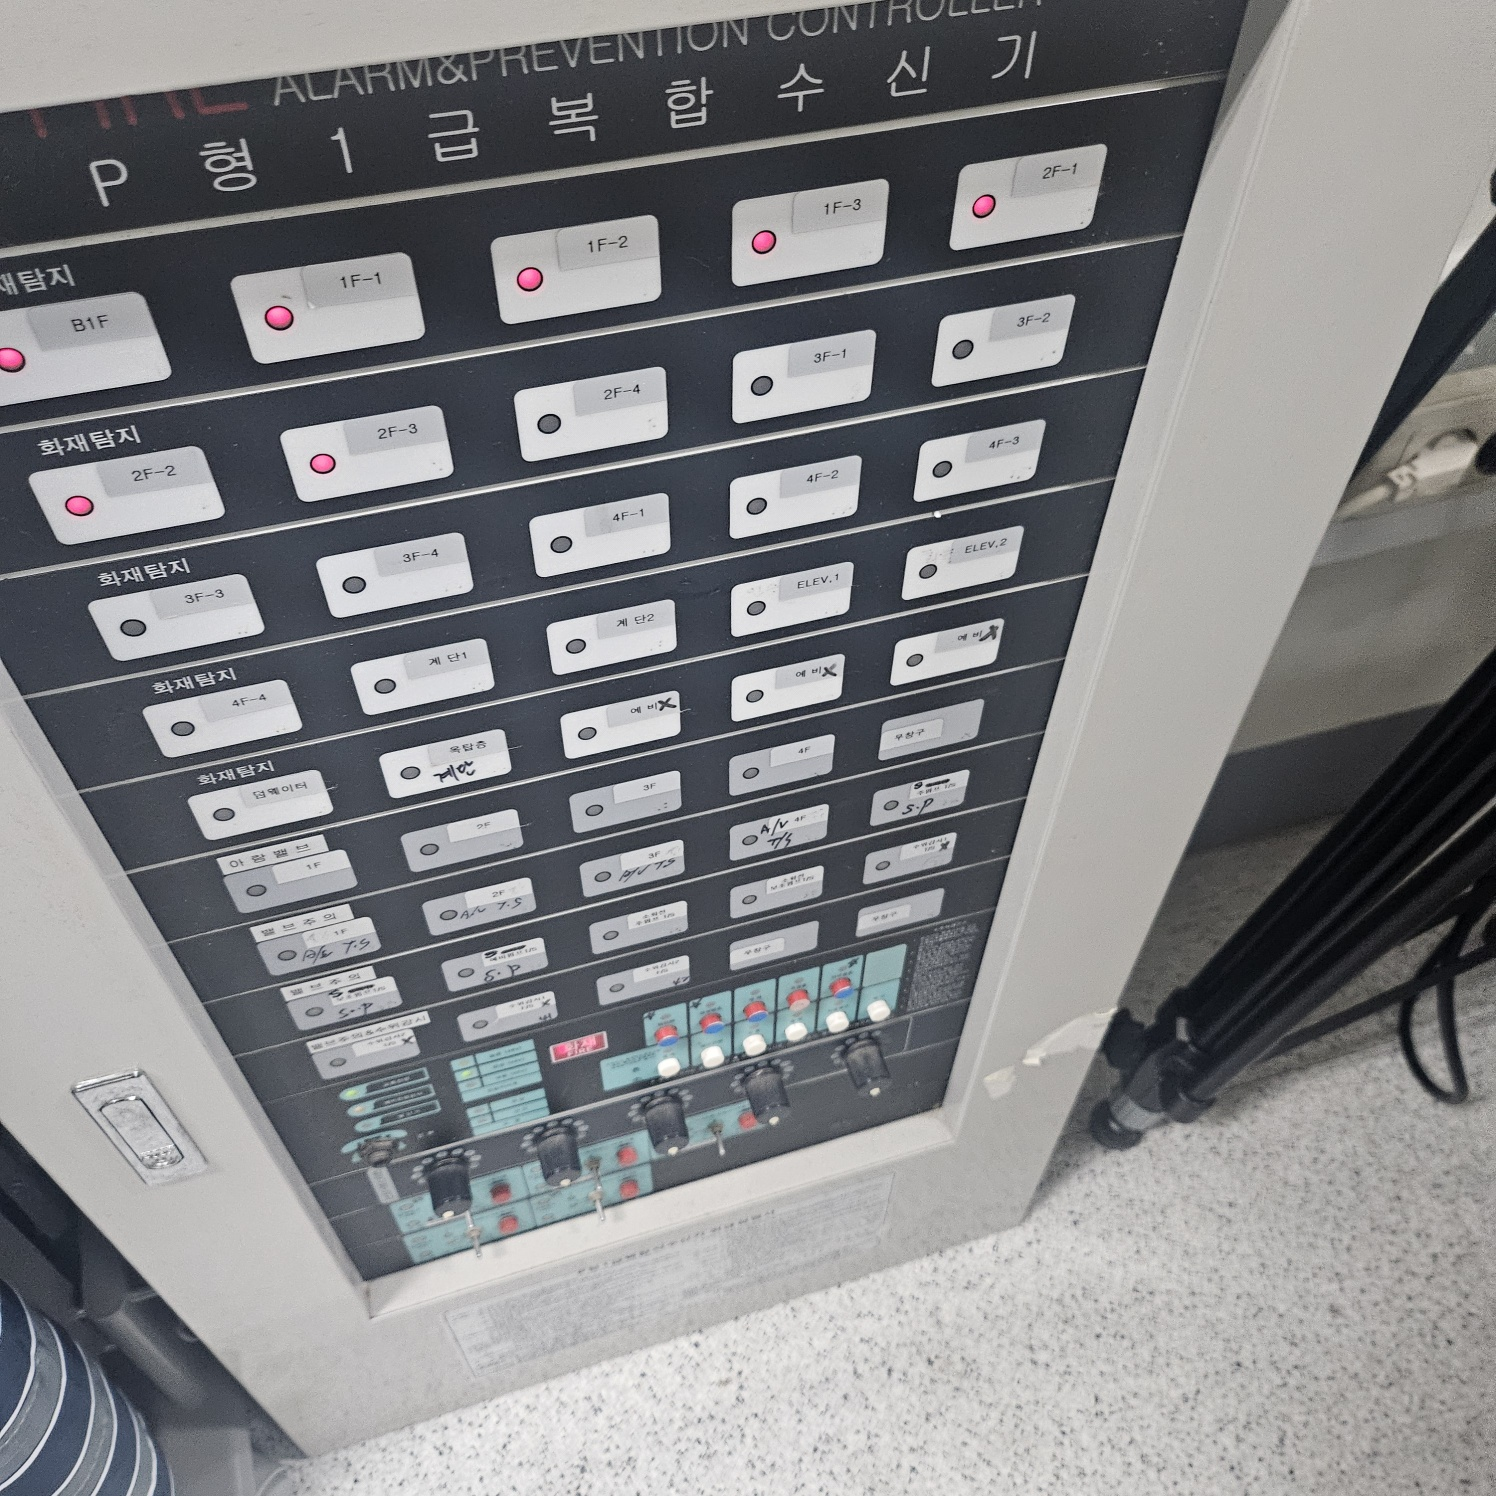

In [91]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/KakaoTalk_20241120_173533688_01.jpg")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [37]:
object_prediction_list = result.object_prediction_list

In [38]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(329.70018005371094, 232.6708927154541, 335.22642517089844, 236.7128791809082), w: 5.5262451171875, h: 4.041986465454102>,
    mask: None,
    score: PredictionScore: <value: 0.5707049369812012>,
    category: Category: <id: 0, name: LEDOff>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [39]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [329.70018005371094,
   232.6708927154541,
   5.5262451171875,
   4.041986465454102],
  'score': 0.5707049369812012,
  'category_id': 0,
  'category_name': 'LEDOff',
  'segmentation': [],
  'iscrowd': 0,
  'area': 22},
 {'image_id': None,
  'bbox': [168.18861389160156,
   285.5755386352539,
   3.3292388916015625,
   2.9404144287109375],
  'score': 0.5663526058197021,
  'category_id': 0,
  'category_name': 'LEDOff',
  'segmentation': [],
  'iscrowd': 0,
  'area': 9},
 {'image_id': None,
  'bbox': [73.92671966552734,
   254.53369140625,
   4.784355163574219,
   1.46630859375],
  'score': 0.5426605343818665,
  'category_id': 0,
  'category_name': 'LEDOff',
  'segmentation': [],
  'iscrowd': 0,
  'area': 7}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [40]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [329.70018005371094,
   232.6708927154541,
   5.5262451171875,
   4.041986465454102],
  'score': 0.5707049369812012,
  'category_id': 0,
  'category_name': 'LEDOff',
  'segmentation': [],
  'iscrowd': 0,
  'area': 22},
 {'image_id': 1,
  'bbox': [168.18861389160156,
   285.5755386352539,
   3.3292388916015625,
   2.9404144287109375],
  'score': 0.5663526058197021,
  'category_id': 0,
  'category_name': 'LEDOff',
  'segmentation': [],
  'iscrowd': 0,
  'area': 9},
 {'image_id': 1,
  'bbox': [73.92671966552734,
   254.53369140625,
   4.784355163574219,
   1.46630859375],
  'score': 0.5426605343818665,
  'category_id': 0,
  'category_name': 'LEDOff',
  'segmentation': [],
  'iscrowd': 0,
  'area': 7}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [41]:
%pip install -U imantics

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 56.4 MB/s eta 0:00:00
  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16025 sha256=da05507b57854719c5f7bc3c662daa5cd6211373256400f2f661702ea74dc695
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\40\e1\8d\fd1fa8f30722831661afc8e6efcda609c72d1b73e11f4d49b7
Successfully built imantics
Note: you may need to restart the kernel to use updated packages.


In [42]:
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [43]:
%pip install -U fiftyone


  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
INFO: pip is looking at multiple versions of motor to determine which version is compatible with other requirements. This could take a while.
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
  Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using ca

In [44]:
result.to_fiftyone_detections()[:3]

[<Detection: {
     'id': '673d881562d3dd9613a8873c',
     'attributes': {},
     'tags': [],
     'label': 'LEDOff',
     'bounding_box': [
         0.6594003601074219,
         0.3102278569539388,
         0.011052490234375,
         0.005389315287272135,
     ],
     'mask': None,
     'confidence': 0.5707049369812012,
     'index': None,
 }>,
 <Detection: {
     'id': '673d881562d3dd9613a8873d',
     'attributes': {},
     'tags': [],
     'label': 'LEDOff',
     'bounding_box': [
         0.3363772277832031,
         0.38076738484700523,
         0.006658477783203125,
         0.003920552571614584,
     ],
     'mask': None,
     'confidence': 0.5663526058197021,
     'index': None,
 }>,
 <Detection: {
     'id': '673d881562d3dd9613a8873e',
     'attributes': {},
     'tags': [],
     'label': 'LEDOff',
     'bounding_box': [
         0.1478534393310547,
         0.3393782552083333,
         0.009568710327148438,
         0.001955078125,
     ],
     'mask': None,
     'confidence

## 4. Batch Prediction

- Set model and directory parameters:

In [96]:
model_type = "yolov5"
model_path = yolov5_model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

In [107]:
import cv2
import os
import time

# 저장 경로 설정
output_folder = "demo_data/" # 저장할 폴더 경로를 지정하세요.
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 카메라 초기화
cap = cv2.VideoCapture(0)  # 기본 카메라(웹캠)를 사용합니다.
frame_rate = 1  # 초당 몇 프레임을 저장할지 설정합니다.
prev_time = time.time()

print(f"카메라 스트림이 시작되었습니다. 저장 경로: {output_folder}")
print("종료하려면 'q'를 누르세요.")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("카메라에서 프레임을 읽을 수 없습니다.")
            break

        # 현재 시간과 이전 시간을 비교해 저장 조건 확인
        current_time = time.time()
        if current_time - prev_time >= 1 / frame_rate:
            prev_time = current_time
            # 파일 이름 생성
            filename = os.path.join(output_folder, f"frame_{int(current_time)}.jpg")
            # 이미지 저장
            cv2.imwrite(filename, frame)
            print(f"이미지 저장: {filename}")

        # 화면에 현재 프레임 표시
        cv2.imshow('Camera Stream', frame)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
finally:
    cap.release()
    cv2.destroyAllWindows()
    print("카메라 스트림이 종료되었습니다.")


카메라 스트림이 시작되었습니다. 저장 경로: demo_data/
종료하려면 'q'를 누르세요.
이미지 저장: demo_data/frame_1732170032.jpg
이미지 저장: demo_data/frame_1732170033.jpg
이미지 저장: demo_data/frame_1732170034.jpg
이미지 저장: demo_data/frame_1732170035.jpg
이미지 저장: demo_data/frame_1732170036.jpg
이미지 저장: demo_data/frame_1732170037.jpg
이미지 저장: demo_data/frame_1732170038.jpg
이미지 저장: demo_data/frame_1732170039.jpg
이미지 저장: demo_data/frame_1732170040.jpg
이미지 저장: demo_data/frame_1732170041.jpg
이미지 저장: demo_data/frame_1732170042.jpg
이미지 저장: demo_data/frame_1732170043.jpg
이미지 저장: demo_data/frame_1732170044.jpg
이미지 저장: demo_data/frame_1732170045.jpg
이미지 저장: demo_data/frame_1732170046.jpg
이미지 저장: demo_data/frame_1732170047.jpg
이미지 저장: demo_data/frame_1732170048.jpg
이미지 저장: demo_data/frame_1732170049.jpg
이미지 저장: demo_data/frame_1732170050.jpg
이미지 저장: demo_data/frame_1732170051.jpg
이미지 저장: demo_data/frame_1732170052.jpg
이미지 저장: demo_data/frame_1732170054.jpg
이미지 저장: demo_data/frame_1732170055.jpg
이미지 저장: demo_data/frame_1732170056.jpg
이미지 저장: dem

- Perform sliced inference on given folder:

In [108]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

YOLOv5  2024-11-20 Python-3.12.7 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 214 layers, 7025023 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 


There are 165 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/165 [00:00<?, ?it/s]

Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 567.36 ms
Performing prediction on 16 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 929.16 ms
Performing prediction on 4 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Performing inference on images:   2%|▏         | 3/165 [00:01<01:32,  1.76it/s]c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.a

Prediction time is: 292.64 ms
Performing prediction on 4 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Performing inference on images:   2%|▏         | 4/165 [00:02<01:14,  2.17it/s]c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.a

Prediction time is: 287.67 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 558.88 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 547.49 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 554.39 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 552.47 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 548.97 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 547.21 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 549.47 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 549.66 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 549.98 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.60 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 550.36 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 554.06 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 546.03 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 553.24 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 563.67 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 572.35 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 561.64 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 554.42 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 550.52 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 547.21 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 555.80 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 548.15 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 557.61 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 548.20 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 573.84 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 559.35 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 567.35 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 556.80 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 555.71 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 561.38 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 559.97 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 882.02 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 589.90 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 557.20 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 557.70 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 558.01 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 556.22 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 550.31 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.58 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 550.85 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 568.50 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 830.11 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 581.43 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 569.60 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 554.84 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 564.24 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 566.06 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 553.90 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 551.46 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 552.03 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 553.13 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 557.05 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 552.62 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 556.37 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 548.16 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 549.11 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 551.46 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 548.34 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 548.05 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.44 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 552.13 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 546.45 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 539.82 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 542.83 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 540.70 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 550.56 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.23 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 542.07 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 544.36 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 557.31 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 567.76 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 558.39 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 538.64 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 551.10 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 542.33 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 540.36 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 543.11 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 546.50 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 546.38 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 541.87 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 543.01 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.74 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 543.44 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 539.05 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 549.19 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 543.68 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 538.66 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 541.74 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 547.16 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 541.69 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 541.40 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 540.91 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 549.08 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 541.48 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 544.19 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 543.30 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 548.12 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 547.76 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 556.78 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 558.00 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 542.62 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.17 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 539.19 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 551.23 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.59 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 542.96 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.66 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 546.18 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 547.85 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 542.42 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 547.79 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 547.66 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.46 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 546.19 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 541.82 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 547.73 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.27 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 549.81 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 543.60 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 550.06 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 543.23 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 544.20 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 548.36 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.02 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.19 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 542.37 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 556.68 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 565.54 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 553.64 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 544.09 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 550.87 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 547.02 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 551.69 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 541.88 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 548.04 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 553.68 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 546.70 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.28 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 544.27 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 549.46 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.02 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 546.01 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 547.86 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 539.81 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 540.77 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 541.91 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 544.49 ms
Performing prediction on 64 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 3479.82 ms
Performing prediction on 64 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 3557.62 ms
Performing prediction on 64 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 3804.38 ms
Performing prediction on 4 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Performing inference on images:  94%|█████████▍| 155/165 [01:36<00:19,  1.93s/it]c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp

Prediction time is: 289.63 ms
Performing prediction on 12 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 734.43 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 545.48 ms
Performing prediction on 9 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 559.75 ms
Performing prediction on 15 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 861.02 ms
Performing prediction on 20 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 1129.67 ms
Performing prediction on 4 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Performing inference on images:  98%|█████████▊| 161/165 [01:41<00:03,  1.21it/s]c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp

Prediction time is: 288.17 ms
Performing prediction on 15 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 862.59 ms
Performing prediction on 18 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 1028.45 ms
Performing prediction on 28 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 1597.81 ms
Performing prediction on 12 slices.


c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\USER\anaconda3\envs\pyqt\Lib\site-packages\yolov5\m

Prediction time is: 710.28 ms
Prediction results are successfully exported to runs\predict\exp4


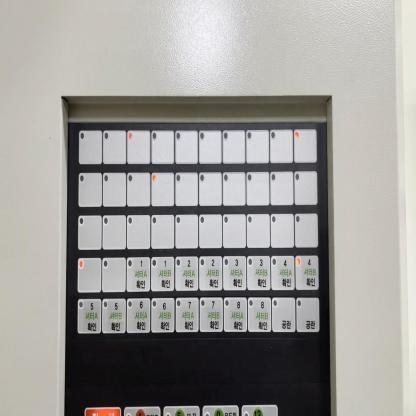

In [56]:
Image("demo_data/buttons_040_jpg.rf.e18017709706615803547b42010ad73d.jpg")

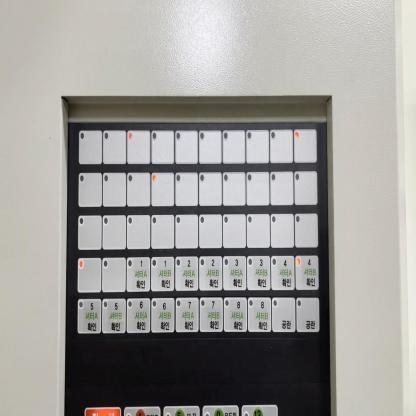

In [57]:

Image("demo_data/buttons_040_jpg.rf.e18017709706615803547b42010ad73d.jpg")